# WeatherPy
----

#### Analysis
* Temps are highest at the equator and decreases as you move towards the North or South pole. Observe that our data seems to be skewed toward the right. There is more land mass in the Northern hemisphere (therefore more cities) and more data is available in this region.
* At the time of this anaysis, the Northern hemisphere has higher levels of humidity compared to areas south of the equator.
* There does not appear to be any correlation between latitude and cloudiness. There is also little to no correlation between wind speed and latitude

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Completed/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Base url
url = "http://api.openweathermap.org/data/2.5/weather?"


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Out of {len(lats)} randomly selected coordinates, {len(cities)} cities were found.")


Out of 1500 randomly selected coordinates, 639 cities were found.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Set up lists to store response info
city_lat = []
city_lon = []
city_temp = []
city_hum = []
city_cloud = []
city_wind = []
city_name = []
city_id = []

for x in range(len(cities)):
    query_url = url + "appid=" + api_key + "&q=" + cities[x] + "&units=imperial"
    
    #response
    try:
        response = requests.get(query_url).json()
 
        city_name.append(response['name'])
        city_id.append(response['id'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_temp.append(response['main']['temp'])
        city_hum.append(response['main']['humidity'])
        city_cloud.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
    
        print(f"Processing Record {x+1} for {city_name[x]}. (city ID: {city_id[x]})")
        print(query_url)
        print()
    
    except:
        city_name.append('N/A')
        city_id.append('N/A')
        city_lat.append('N/A')
        city_lon.append('N/A')
        city_temp.append('N/A')
        city_hum.append('N/A')
        city_cloud.append('N/A')
        city_wind.append('N/A')
        print(f"Processing Record {x+1} for {cities[x]}. City not found. Skipping...")
        print()
    

Processing Record 1 for Manjacaze. (city ID: 1040938)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=manjacaze&units=imperial

Processing Record 2 for amderma. City not found. Skipping...

Processing Record 3 for Busselton. (city ID: 2075265)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=busselton&units=imperial

Processing Record 4 for Lazaro Cardenas. (city ID: 3996234)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=lazaro cardenas&units=imperial

Processing Record 5 for Guiratinga. (city ID: 3461733)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=guiratinga&units=imperial

Processing Record 6 for Albany. (city ID: 5106834)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=albany&units=imperial

Processing Record 7 for Labuhan. (city ID: 1641899)
http://api.openweathermap.org/data/2.5

Processing Record 54 for Pemba. (city ID: 1028918)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=pemba&units=imperial

Processing Record 55 for Wells. (city ID: 2634569)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=wells&units=imperial

Processing Record 56 for Alcudia. (city ID: 2522091)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=alcudia&units=imperial

Processing Record 57 for Narsaq. (city ID: 3421719)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=narsaq&units=imperial

Processing Record 58 for Butaritari. (city ID: 2110227)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=butaritari&units=imperial

Processing Record 59 for Rikitea. (city ID: 4030556)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=rikitea&units=imperial

Processing Rec

Processing Record 110 for College. (city ID: 5859699)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=college&units=imperial

Processing Record 111 for Daru. (city ID: 2098329)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=daru&units=imperial

Processing Record 112 for Izumo. (city ID: 1861084)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=izumo&units=imperial

Processing Record 113 for Mirabad. (city ID: 1160571)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=mirabad&units=imperial

Processing Record 114 for Puerto Ayora. (city ID: 3652764)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=puerto ayora&units=imperial

Processing Record 115 for Provideniya. (city ID: 4031574)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=provideniya&units=imperi

Processing Record 162 for Cockburn Town. (city ID: 3576994)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=cockburn town&units=imperial

Processing Record 163 for Paamiut. (city ID: 3421193)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=paamiut&units=imperial

Processing Record 164 for Namanyere. (city ID: 151986)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=namanyere&units=imperial

Processing Record 165 for Ballina. (city ID: 2966778)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=ballina&units=imperial

Processing Record 166 for Kahului. (city ID: 5847411)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=kahului&units=imperial

Processing Record 167 for Bellevue. (city ID: 2819564)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=bellevue&uni

Processing Record 213 for Svetlogorsk. (city ID: 584051)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=svetlogorsk&units=imperial

Processing Record 214 for Bonthe. (city ID: 2409914)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=bonthe&units=imperial

Processing Record 215 for Nhulunbuy. (city ID: 2064735)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=nhulunbuy&units=imperial

Processing Record 216 for Antofagasta. (city ID: 3899539)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=antofagasta&units=imperial

Processing Record 217 for Novopokrovka. (city ID: 699328)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=novopokrovka&units=imperial

Processing Record 218 for Changli. (city ID: 1793900)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=ch

Processing Record 264 for Nyurba. (city ID: 2018735)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=nyurba&units=imperial

Processing Record 265 for Minot. (city ID: 5690532)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=minot&units=imperial

Processing Record 266 for karaul. City not found. Skipping...

Processing Record 267 for bairiki. City not found. Skipping...

Processing Record 268 for Egvekinot. (city ID: 4031742)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=egvekinot&units=imperial

Processing Record 269 for Maniitsoq. (city ID: 3421982)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=maniitsoq&units=imperial

Processing Record 270 for Santa Maria. (city ID: 3462672)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=santa maria&units=imperial

Processing Record 271 for Souilla

Processing Record 316 for Swan Hill. (city ID: 2147756)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=swan hill&units=imperial

Processing Record 317 for Praia da Vitoria. (city ID: 3372760)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=praia da vitoria&units=imperial

Processing Record 318 for Lorengau. (city ID: 2092164)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=lorengau&units=imperial

Processing Record 319 for Pa Daet. (city ID: 1608068)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=pa daet&units=imperial

Processing Record 320 for Gwanda. (city ID: 890516)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=gwanda&units=imperial

Processing Record 321 for Mackay. (city ID: 5921525)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=mackay&u

Processing Record 370 for Dickinson. (city ID: 5688789)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=dickinson&units=imperial

Processing Record 371 for Worthing. (city ID: 2633521)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=worthing&units=imperial

Processing Record 372 for Ulladulla. (city ID: 2145554)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=ulladulla&units=imperial

Processing Record 373 for Nelson Bay. (city ID: 2155562)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=nelson bay&units=imperial

Processing Record 374 for Fukue. (city ID: 1848373)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=fukue&units=imperial

Processing Record 375 for krasnoselkup. City not found. Skipping...

Processing Record 376 for Koudougou. (city ID: 2358946)
http://api.openweathermap.org/dat

Processing Record 423 for Olavarria. (city ID: 3842670)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=olavarria&units=imperial

Processing Record 424 for West Fargo. (city ID: 5062458)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=west fargo&units=imperial

Processing Record 425 for sataua. City not found. Skipping...

Processing Record 426 for Bambous Virieux. (city ID: 1106677)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=bambous virieux&units=imperial

Processing Record 427 for Vallenar. (city ID: 3868633)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=vallenar&units=imperial

Processing Record 428 for Zhezkazgan. (city ID: 1516589)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=zhezkazgan&units=imperial

Processing Record 429 for Santa Isabel. (city ID: 3996069)
http://api.ope

Processing Record 476 for Coracora. (city ID: 3942259)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=coracora&units=imperial

Processing Record 477 for Novikovo. (city ID: 487928)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=novikovo&units=imperial

Processing Record 478 for Harer. (city ID: 5585000)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=harer&units=imperial

Processing Record 479 for Haskovo. (city ID: 730435)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=haskovo&units=imperial

Processing Record 480 for Turayf. (city ID: 101312)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=turayf&units=imperial

Processing Record 481 for lolua. City not found. Skipping...

Processing Record 482 for Ambovombe. (city ID: 1079048)
http://api.openweathermap.org/data/2.5/weather?appid=b45d

Processing Record 527 for Gladenbach. (city ID: 2920229)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=gladenbach&units=imperial

Processing Record 528 for Gevrai. (city ID: 1271413)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=gevrai&units=imperial

Processing Record 529 for Eugene. (city ID: 5725846)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=eugene&units=imperial

Processing Record 530 for El Fuerte. (city ID: 4009788)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=el fuerte&units=imperial

Processing Record 531 for Ahipara. (city ID: 2194098)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=ahipara&units=imperial

Processing Record 532 for tapaua. City not found. Skipping...

Processing Record 533 for Jahazpur. (city ID: 1269545)
http://api.openweathermap.org/data/2.5/weather

Processing Record 579 for bandar-e torkaman. City not found. Skipping...

Processing Record 580 for Adrar. (city ID: 2508813)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=adrar&units=imperial

Processing Record 581 for Sindor. (city ID: 492860)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=sindor&units=imperial

Processing Record 582 for Padang. (city ID: 1633419)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=padang&units=imperial

Processing Record 583 for Katherine. (city ID: 2068655)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=katherine&units=imperial

Processing Record 584 for Kamloops. (city ID: 5989045)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=kamloops&units=imperial

Processing Record 585 for Tam Ky. (city ID: 1567148)
http://api.openweathermap.org/data/2.5/weather

Processing Record 631 for Marienburg. (city ID: 2803461)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=marienburg&units=imperial

Processing Record 632 for sorvag. City not found. Skipping...

Processing Record 633 for Werda. (city ID: 932960)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=werda&units=imperial

Processing Record 634 for Belmonte. (city ID: 8010472)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=belmonte&units=imperial

Processing Record 635 for Beyneu. (city ID: 610298)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=beyneu&units=imperial

Processing Record 636 for Fort Thomas. (city ID: 4292071)
http://api.openweathermap.org/data/2.5/weather?appid=b45d4fd5aeb75577ceecf76dd16f21d2&q=fort thomas&units=imperial

Processing Record 637 for Bucak. (city ID: 320533)
http://api.openweathermap.org/data/2.5/weather?a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a Pandas Dataframe
dict = {'City': city_name, 'City ID': city_id, 'Temperature': city_temp, 'Humidity': city_hum, 'Cloudiness': city_cloud, 'Wind Speed': city_wind, 'Latitude': city_lat, 'Longitude': city_lon}
df = pd.DataFrame(dict)

# Delete the NaN rows
df = df[df.City != 'N/A']

# Save
df.to_csv('cities.csv')

# Display dataframe
df.head(25)

,City,City ID,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Manjacaze,1040938,79.79,61,15,7.99,-24.71,33.88
2,Busselton,2075265,54.27,50,61,11.81,-33.64,115.35
3,Lazaro Cardenas,3996234,62.69,54,5,8.05,28.39,-105.62
4,Guiratinga,3461733,98.04,33,96,3.36,-16.35,-53.76
5,Albany,5106834,57.07,50,20,11.41,42.65,-73.75
6,Labuhan,1641899,75.96,80,0,2.57,-2.54,115.51
7,Punta Arenas,3874787,52.79,46,100,21.92,-53.16,-70.91
8,Lebu,344979,56.64,66,0,5.84,8.96,38.73
9,Kapaa,5848280,74.66,73,20,2.73,22.08,-159.32
10,Tahara,1851259,65.77,88,75,16.11,34.64,137.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

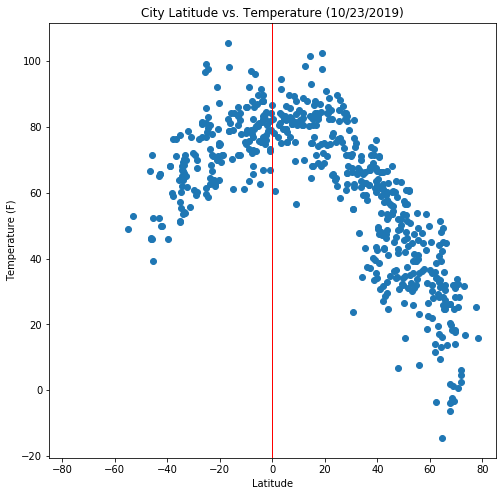

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(df.Latitude, df.Temperature)

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs. Temperature (10/23/2019)')
plt.axvline(x=0, color='r', linewidth=1)
plt.xlim(-85,85)

plt.savefig("temp_vs_lat.png")
plt.show()

#### Latitude vs. Humidity Plot

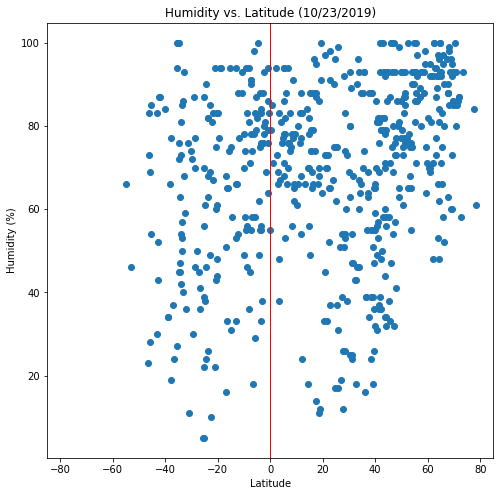

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(df.Latitude, df.Humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude (10/23/2019)')
plt.axvline(x=0, color='r', linewidth=1)
plt.xlim(-85,85)

plt.savefig("humidity_vs_lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

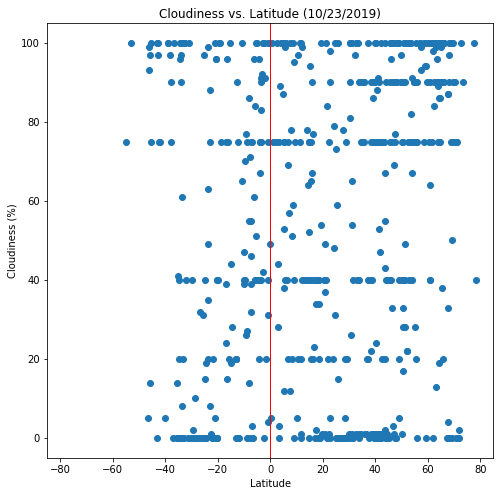

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(df.Latitude, df.Cloudiness)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude (10/23/2019)')
plt.axvline(x=0, color='r', linewidth=1)
plt.xlim(-85,85)

plt.savefig("cloudiness_vs_lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

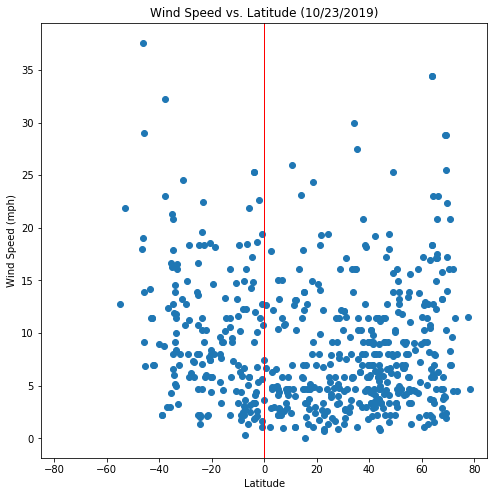

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(df.Latitude, df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. Latitude (10/23/2019)')
plt.axvline(x=0, color='r', linewidth=1)
plt.xlim(-85,85)

plt.savefig("windspeed_vs_lat.png")
plt.show()